In [87]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [88]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Amozon Dataset/amazon_co-ecommerce_sample.csv")
df.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


Data Cleaning

In [89]:
df.shape

(10000, 18)

In [90]:
df.columns

Index(['index', 'uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

index, uniq_id, product_name, manufacturer, price, number_available_in_stock, number_of_reviews, number_of_answered_questions, average_review_rating, amazon_category_and_sub_category

In [91]:
df = df[['index', 'uniq_id', 'product_name', 'manufacturer', 'price', 'number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating', 'amazon_category_and_sub_category']]
df.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [92]:
df = df.drop(["index","uniq_id"] , axis = 1)

In [93]:
df["product_name"].unique()

array(['Hornby 2014 Catalogue',
       'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke',
       'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY',
       ..., 'Defiance Lawkeeper Metal Badge Prop Replica',
       'Justice League of America Series 3 Green Lantern Action Figure',
       'Star Wars 1/72 Y-Wing Starfighter'], dtype=object)

In [94]:
df["price"] = df["price"].str.replace("£","")

In [95]:
df["number_available_in_stock"] = df["number_available_in_stock"].str.replace("\xa0new","")
df["number_available_in_stock"].unique()


array(['5', nan, '2', '3', '4', '1', '6', '18', '12', '1\xa0used', '26',
       '37', '35', '22', '11', '16', '31', '9', '29', '33', '7', '15',
       '13', '19', '27', '10', '39', '23', '38', '8', '17', '34', '30',
       '21', '14', '32', '3\xa0used', '20', '43', '25', '24', '8\xa0used',
       '7\xa0used', '41', '47', '73', '58', '49', '36', '72',
       '1\xa0collectible', '40', '1\xa0refurbished', '28', '2\xa0used',
       '6\xa0used', '69', '44', '55', '56', '52', '71', '86', '60', '92',
       '65', '74', '50', '63', '78', '4\xa0used', '51', '53', '64', '48',
       '57', '42', '46', '14\xa0used', '5\xa0used', '2\xa0collectible',
       '54', '59', '66', '45', '62', '70', '10\xa0used', '12\xa0used',
       '9\xa0used'], dtype=object)

In [96]:
df["number_available_in_stock"] = df["number_available_in_stock"].str.replace("\xa0used","")
df["number_available_in_stock"].unique()

array(['5', nan, '2', '3', '4', '1', '6', '18', '12', '26', '37', '35',
       '22', '11', '16', '31', '9', '29', '33', '7', '15', '13', '19',
       '27', '10', '39', '23', '38', '8', '17', '34', '30', '21', '14',
       '32', '20', '43', '25', '24', '41', '47', '73', '58', '49', '36',
       '72', '1\xa0collectible', '40', '1\xa0refurbished', '28', '69',
       '44', '55', '56', '52', '71', '86', '60', '92', '65', '74', '50',
       '63', '78', '51', '53', '64', '48', '57', '42', '46',
       '2\xa0collectible', '54', '59', '66', '45', '62', '70'],
      dtype=object)

In [97]:
df["number_available_in_stock"] = df["number_available_in_stock"].str.replace("\xa0refurbished","")
df["number_available_in_stock"].unique()

array(['5', nan, '2', '3', '4', '1', '6', '18', '12', '26', '37', '35',
       '22', '11', '16', '31', '9', '29', '33', '7', '15', '13', '19',
       '27', '10', '39', '23', '38', '8', '17', '34', '30', '21', '14',
       '32', '20', '43', '25', '24', '41', '47', '73', '58', '49', '36',
       '72', '1\xa0collectible', '40', '28', '69', '44', '55', '56', '52',
       '71', '86', '60', '92', '65', '74', '50', '63', '78', '51', '53',
       '64', '48', '57', '42', '46', '2\xa0collectible', '54', '59', '66',
       '45', '62', '70'], dtype=object)

In [98]:
df["number_available_in_stock"] = df["number_available_in_stock"].str.replace("\xa0collectible","")
df["number_available_in_stock"].unique()

array(['5', nan, '2', '3', '4', '1', '6', '18', '12', '26', '37', '35',
       '22', '11', '16', '31', '9', '29', '33', '7', '15', '13', '19',
       '27', '10', '39', '23', '38', '8', '17', '34', '30', '21', '14',
       '32', '20', '43', '25', '24', '41', '47', '73', '58', '49', '36',
       '72', '40', '28', '69', '44', '55', '56', '52', '71', '86', '60',
       '92', '65', '74', '50', '63', '78', '51', '53', '64', '48', '57',
       '42', '46', '54', '59', '66', '45', '62', '70'], dtype=object)

In [99]:
df["number_available_in_stock"] = df["number_available_in_stock"].astype("float64")

In [100]:
df["number_of_reviews"] = df["number_of_reviews"].str.replace(",","")

In [101]:
df["number_of_reviews"] = df["number_of_reviews"].astype("float64")

In [102]:
df["number_of_answered_questions"].unique()

array([ 1.,  2.,  7., nan,  6.,  5.,  4.,  3., 11., 28., 23., 39., 10.,
       14.,  9., 12., 19.,  8., 13., 17.])

In [103]:
df["number_of_answered_questions"] = df["number_of_answered_questions"].astype("float64")

In [104]:
df["average_review_rating"] = df["average_review_rating"].str[:3]

In [106]:
df["average_review_rating"] = df["average_review_rating"].astype("float64")

In [108]:
df["amazon_category_and_sub_category"].unique()

array(['Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Lamps & Lighting',
       'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Locomotives',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Signal & Sound',
       'Hobbies > Model Trains & Railway Sets > Accessories > Recreational Activities',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Transformers & Decoders',
       nan,
       'Characters & Brands > Thomas & Friends > Train Play > Wooden Thomas',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Control Moduls',
       'Hobbies > Model Trains & Railway Sets > Accessories > Landscaping',
       'Characters & Brands > Thomas & Friends > Train Play > Motor Road & Rail',
       'Characters & Brands > Hasbro',
       'Characters & Brands > Star Wars > Toys',
       'Characters & Brand

In [112]:
X = df["amazon_category_and_sub_category"].str.split(">",expand=True)

In [120]:
df["Category"] = X[0]

In [121]:
df["sub_category"] = X[1]

In [132]:
df = df.drop(["amazon_category_and_sub_category"],axis = 1)
df

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,Category,sub_category
0,Hornby 2014 Catalogue,Hornby,3.42,5.0,15.0,1.0,4.9,Hobbies,Model Trains & Railway Sets
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2.0,1.0,4.5,Hobbies,Model Trains & Railway Sets
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2.0,17.0,2.0,3.9,Hobbies,Model Trains & Railway Sets
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1.0,2.0,5.0,Hobbies,Model Trains & Railway Sets
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3.0,2.0,4.7,Hobbies,Model Trains & Railway Sets
...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5.0,3.0,3.0,5.0,Hobbies,Collectible Figures & Memorabilia
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1.0,3.0,4.0,Characters & Brands,Star Wars
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3.0,1.0,3.0,5.0,Novelty & Special Use,Novelty
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3.0,1.0,3.0,5.0,Hobbies,Collectible Figures & Memorabilia


In [134]:
df = df.drop(["product_name"],axis = 1)

In [141]:
df["number_available_in_stock"].unique()

array([ 5., nan,  2.,  3.,  4.,  1.,  6., 18., 12., 26., 37., 35., 22.,
       11., 16., 31.,  9., 29., 33.,  7., 15., 13., 19., 27., 10., 39.,
       23., 38.,  8., 17., 34., 30., 21., 14., 32., 20., 43., 25., 24.,
       41., 47., 73., 58., 49., 36., 72., 40., 28., 69., 44., 55., 56.,
       52., 71., 86., 60., 92., 65., 74., 50., 63., 78., 51., 53., 64.,
       48., 57., 42., 46., 54., 59., 66., 45., 62., 70.])

EDA

Univarient analysis

In [150]:
df["price"] = df["price"].str[:4]

In [153]:
df["price"] = df["price"].str.replace(",","")

In [154]:
df["price"] = df["price"].astype("float64")

In [156]:
df.dtypes

manufacturer                     object
price                           float64
number_available_in_stock       float64
number_of_reviews               float64
number_of_answered_questions    float64
average_review_rating           float64
Category                         object
sub_category                     object
dtype: object

In [237]:
# categorical varieble
# Top 10 manufracture
A1 = df.groupby(["manufacturer"])["price"].count().reset_index().sort_values(by = "price",ascending = False).head(10)
A1

,manufacturer,price
1598,Oxford Diecast,152
1236,LEGO,138
601,Disney,136
1708,Playmobil,120
2211,The Puppet Company,102
2037,Star Wars,93
1512,MyTinyWorld,93
1388,Mattel,77
979,Hasbro,75
480,Corgi,72


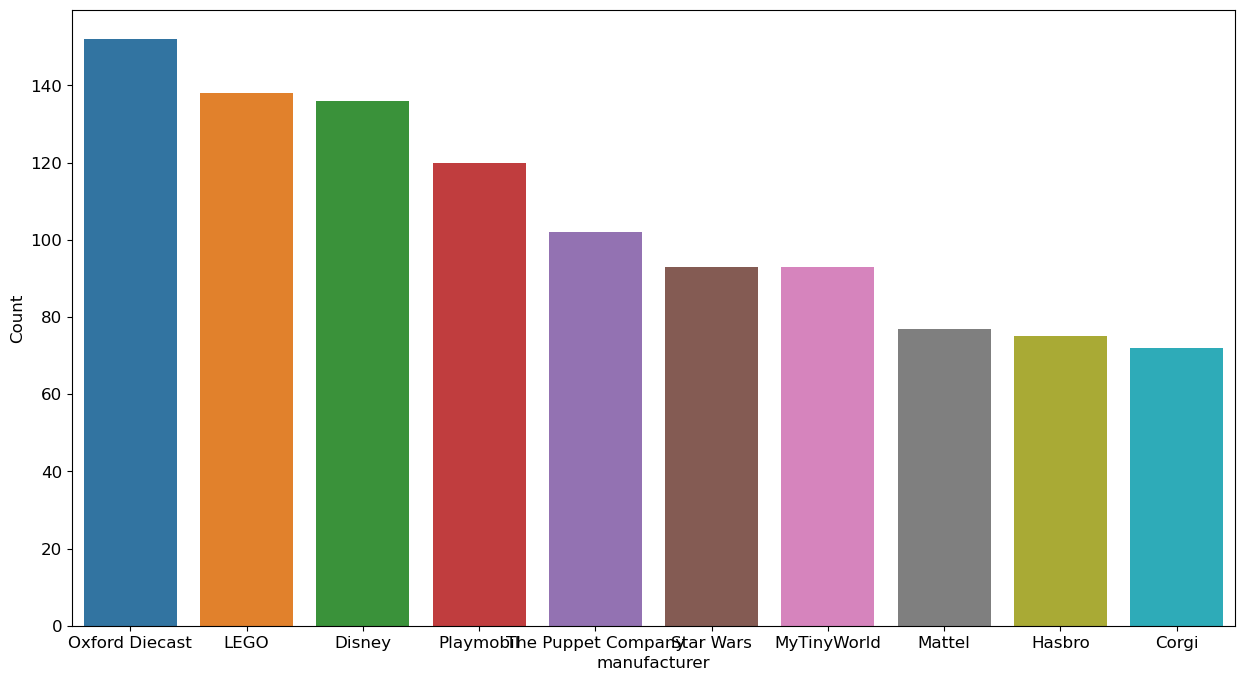

In [238]:
plt.figure(figsize = (15,8))
sns.barplot(x = A1["manufacturer"],y = A1["price"])
plt.ylabel("Count")
plt.show()

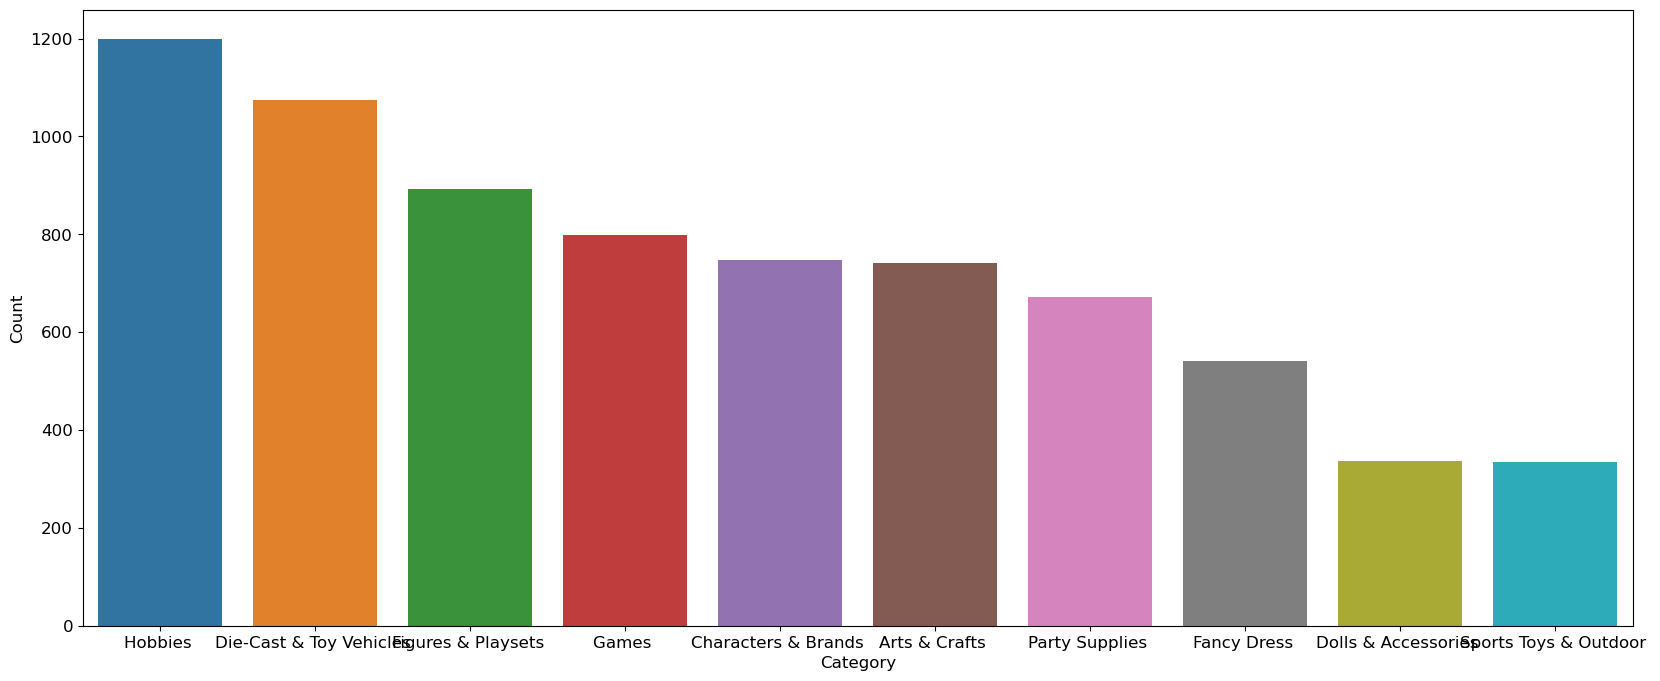

In [239]:
# category
A1 = df.groupby(["Category"])["price"].count().reset_index().sort_values(by = "price",ascending = False).head(10)
plt.figure(figsize = (20,8))
sns.barplot(x = A1["Category"],y = A1["price"])
plt.ylabel("Count")
plt.show()

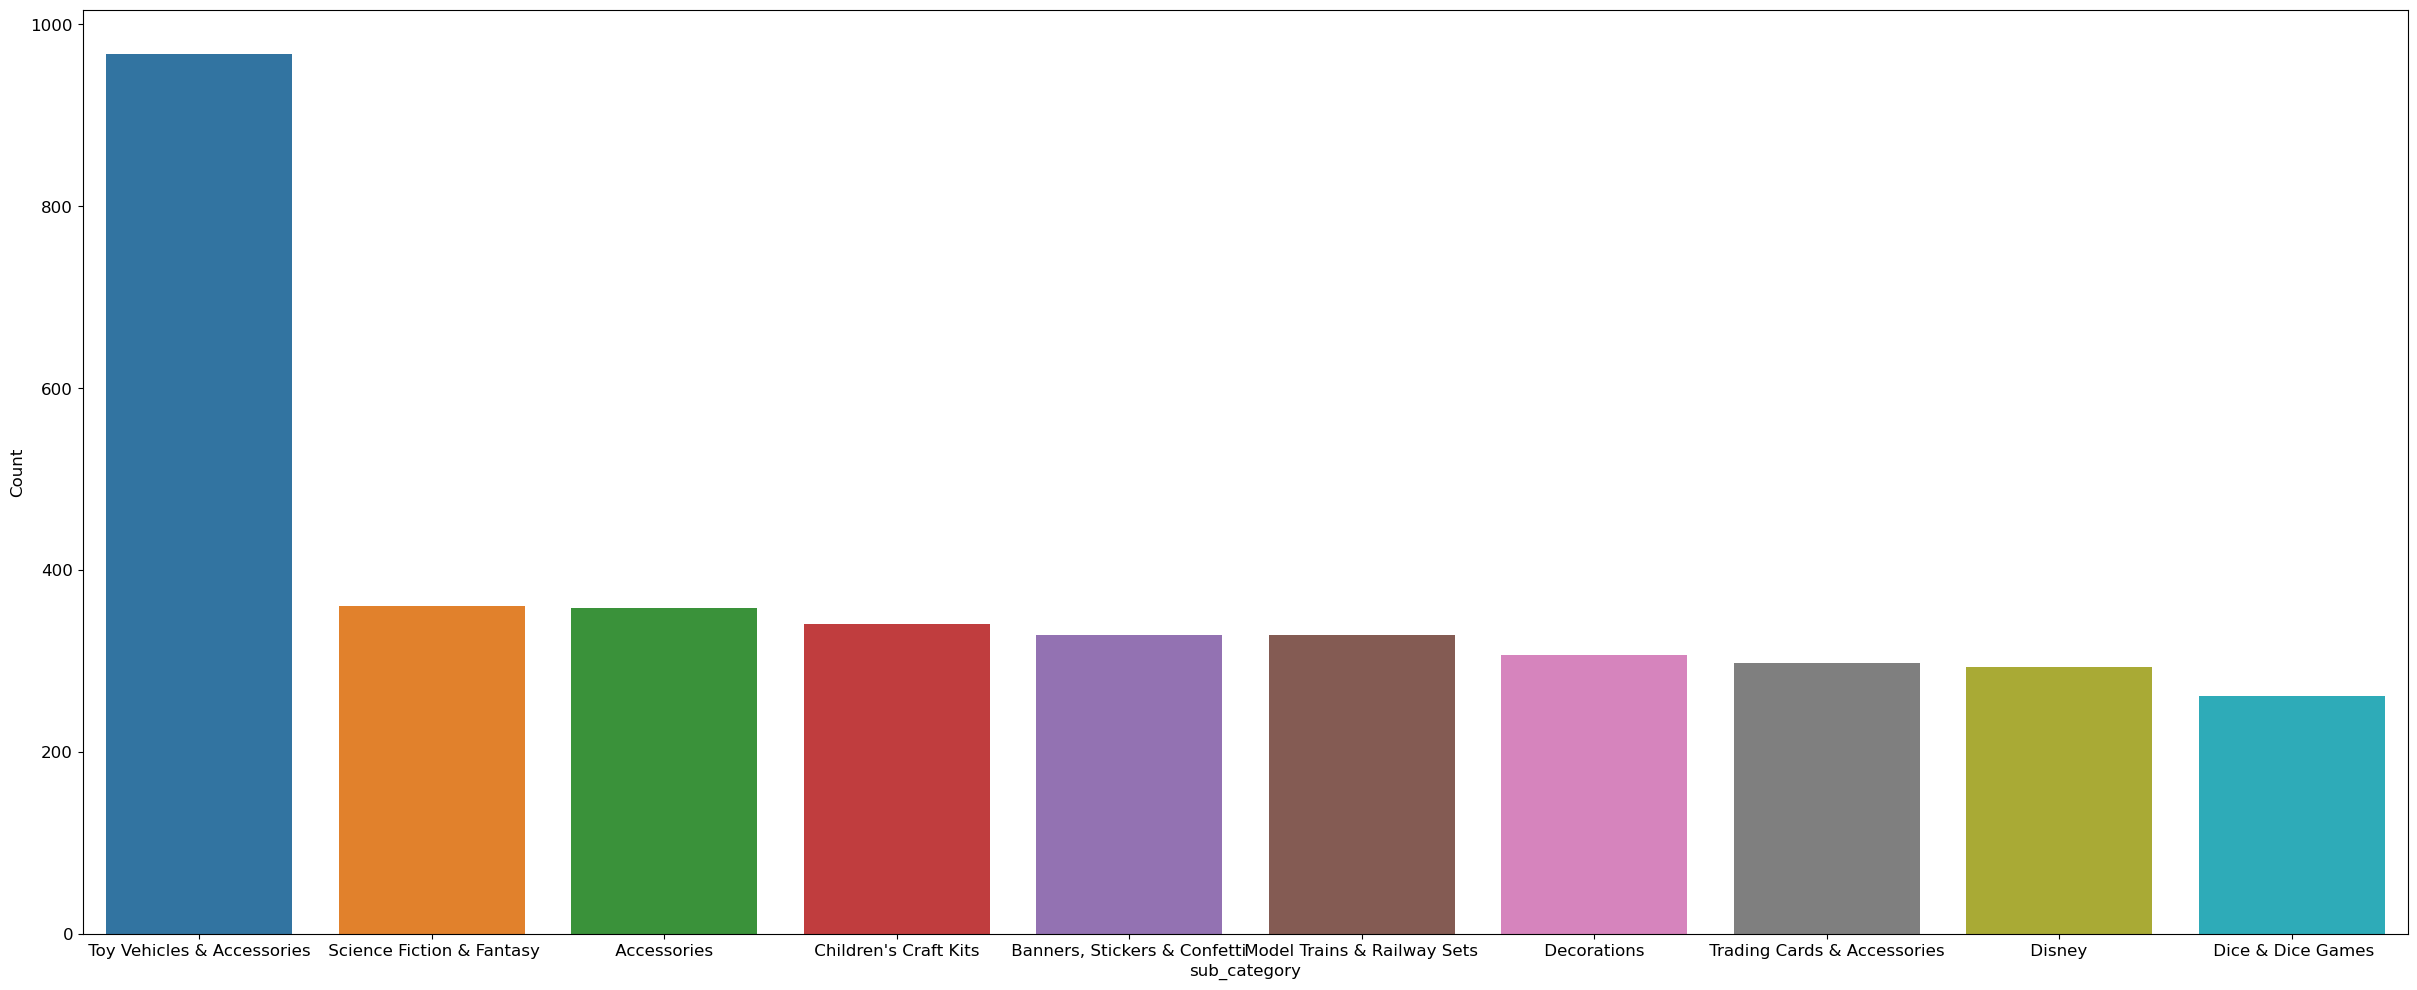

In [240]:
# subcategory
A1 = df.groupby(["sub_category"])["price"].count().reset_index().sort_values(by = "price",ascending = False).head(10)
plt.figure(figsize = (30,12))
sns.barplot(x = A1["sub_category"],y = A1["price"])
plt.ylabel("Count")
plt.rcParams.update({'font.size': 12})
plt.show()

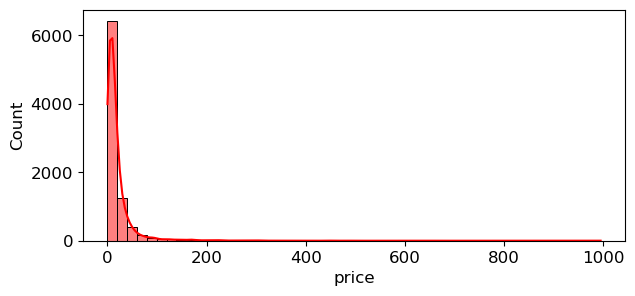

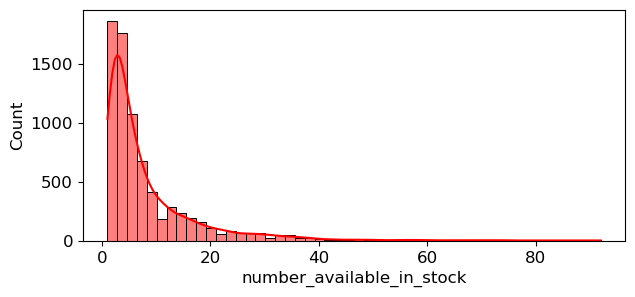

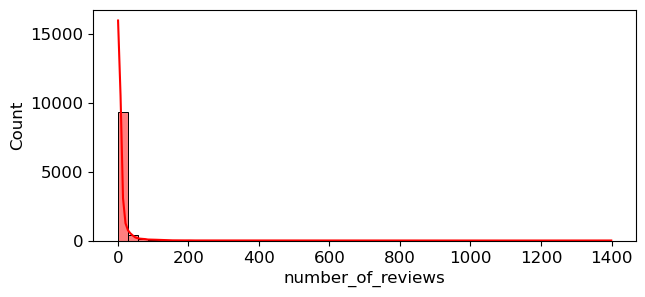

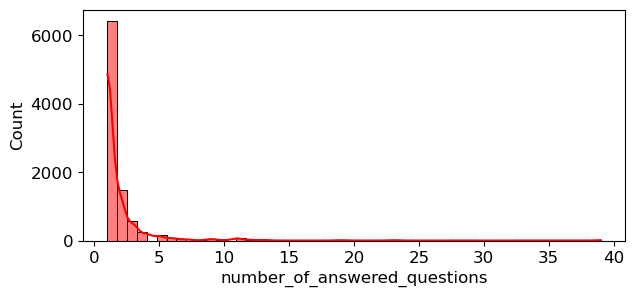

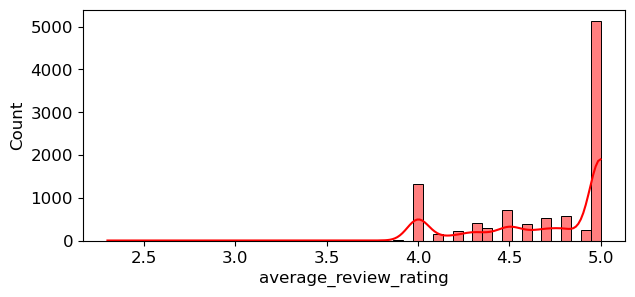

In [266]:
# countinous feature

numeric = ["int32","int64","float32","float64"]
cols = df.select_dtypes(include = numeric).columns
for i in cols:
    plt.figure(figsize = (7,3))
    sns.histplot(x = df[i] , bins = 50 , kde = True , color = "red")
 

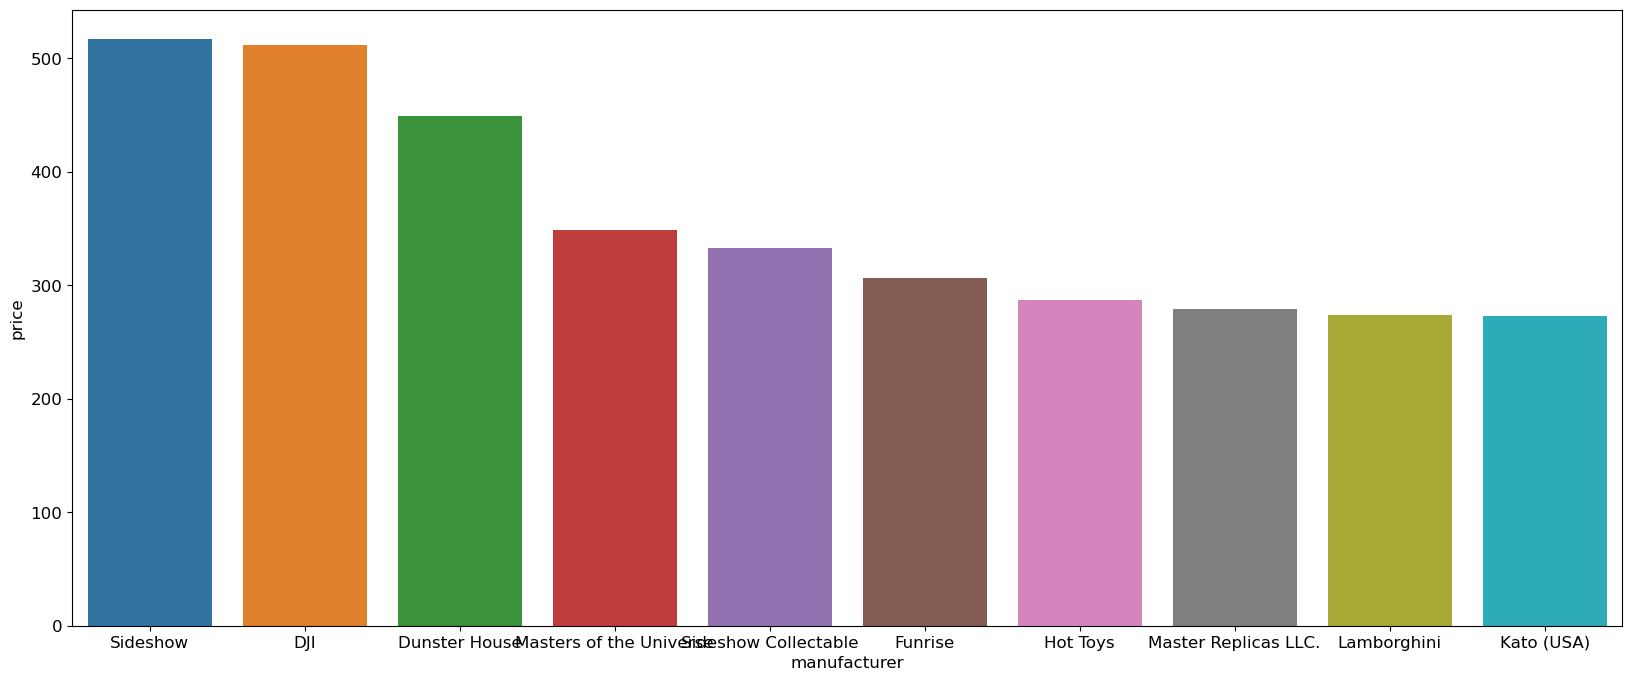

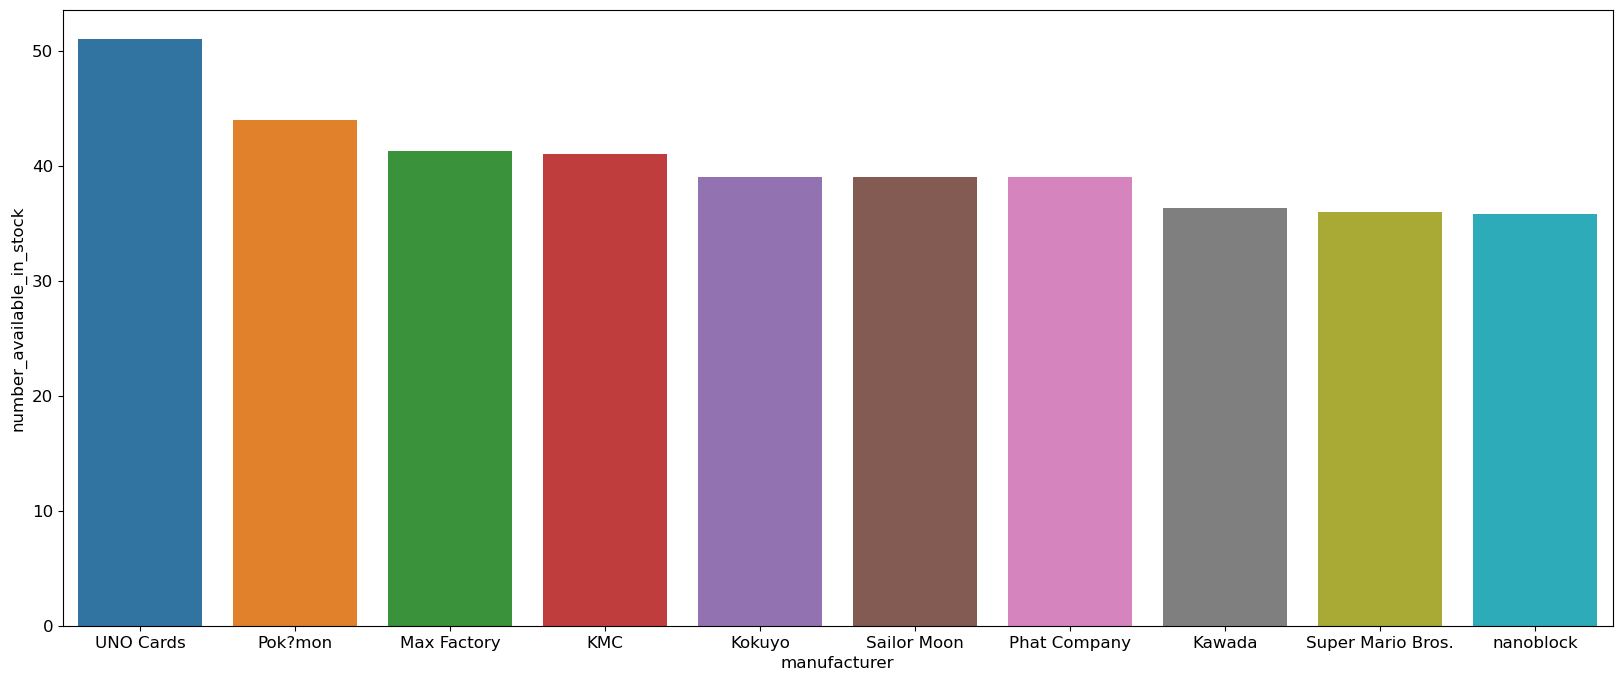

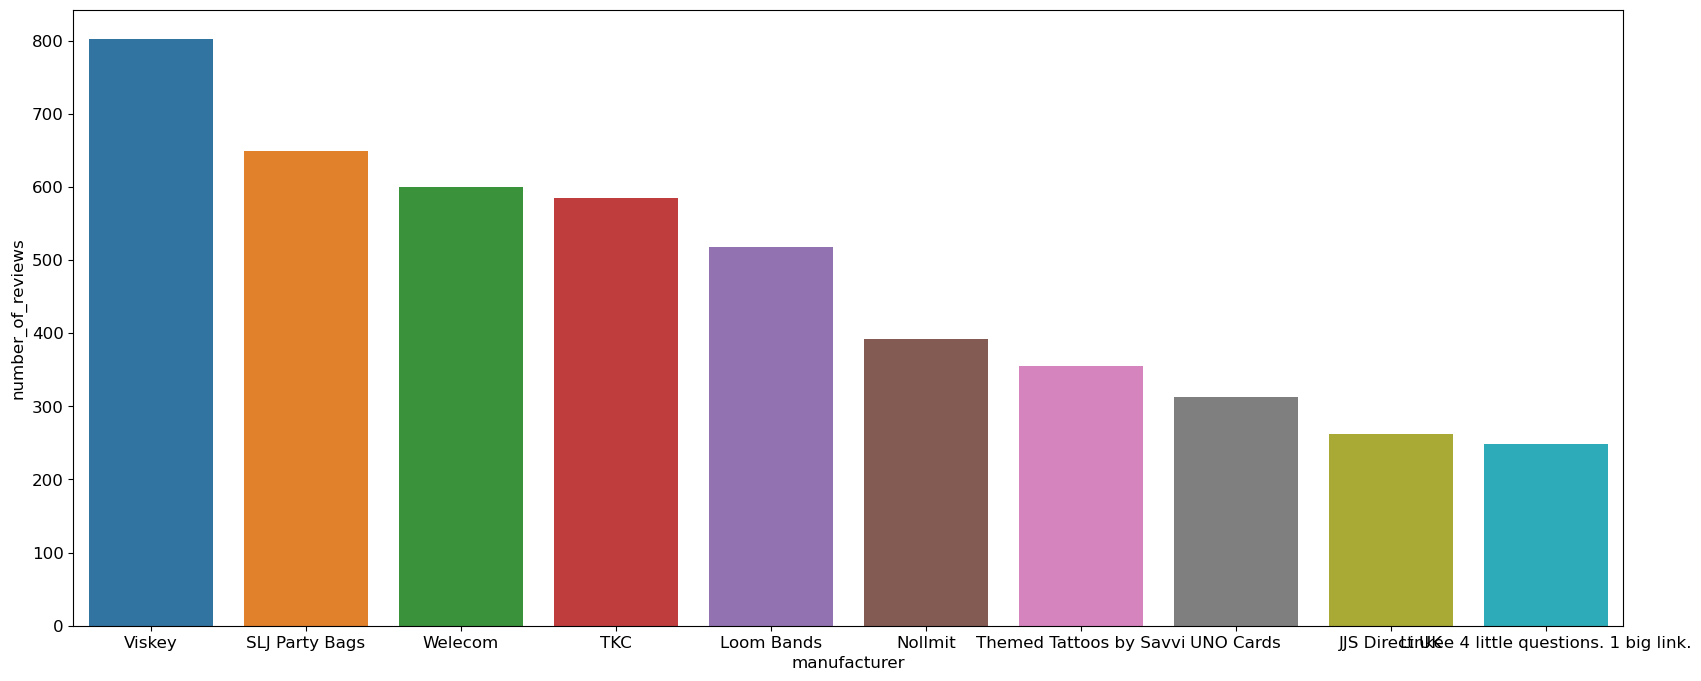

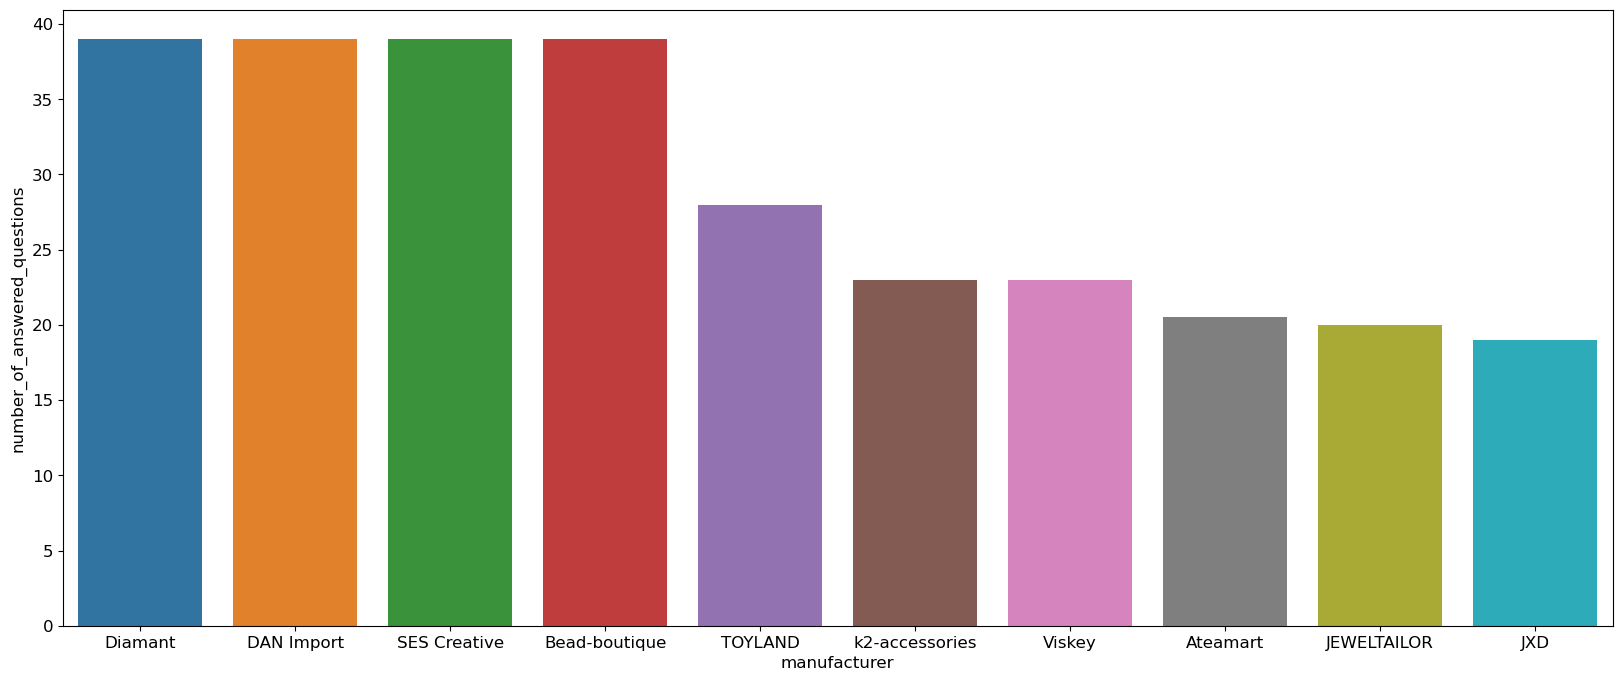

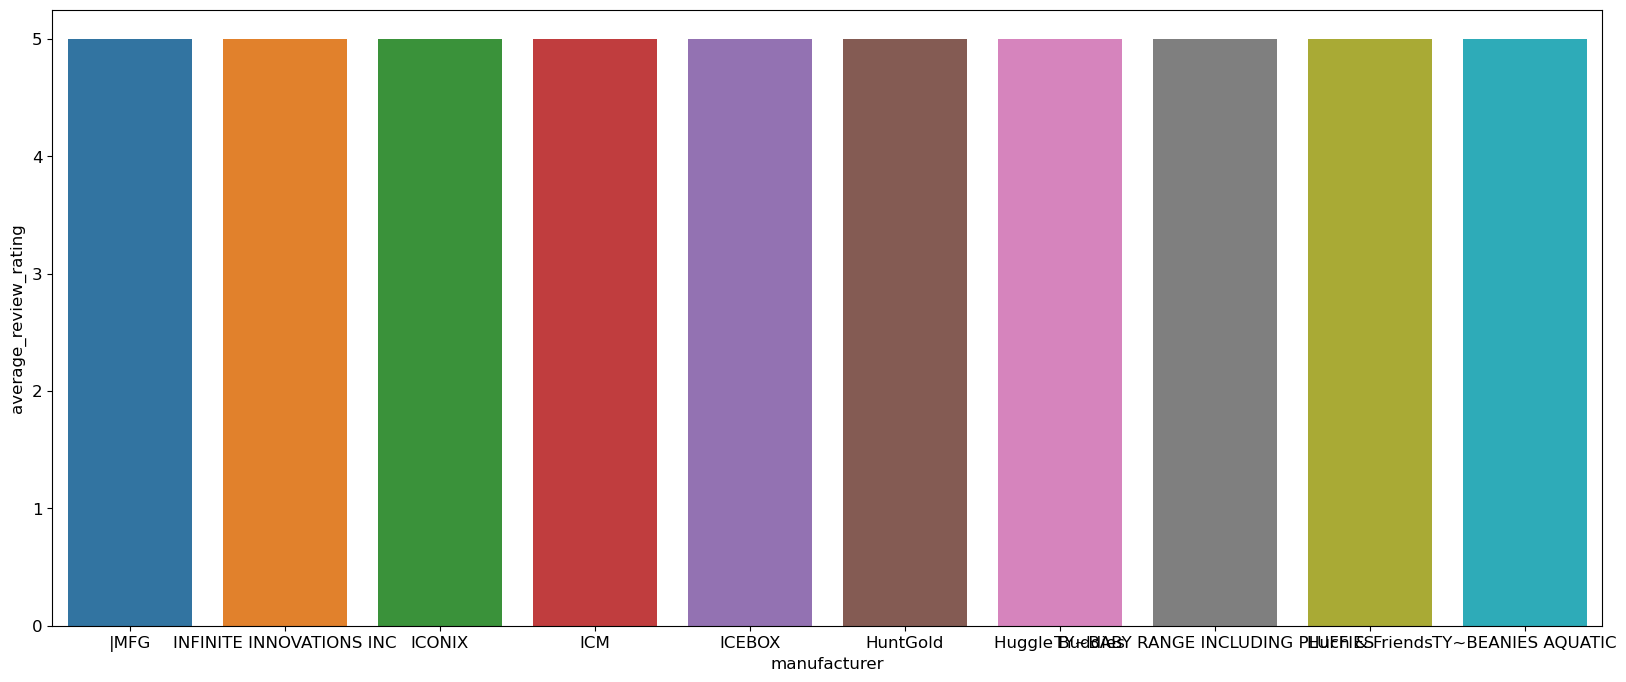

In [271]:
# bivarient analysis
# categorical varieble
cols = df.select_dtypes(include = numeric).columns
for i in cols:
    A1 = df.groupby(["manufacturer"])[i].mean().reset_index().sort_values(by = i,ascending = False).head(10)
    plt.figure(figsize = (20,8))
    sns.barplot(x = A1["manufacturer"] , y = A1[i])


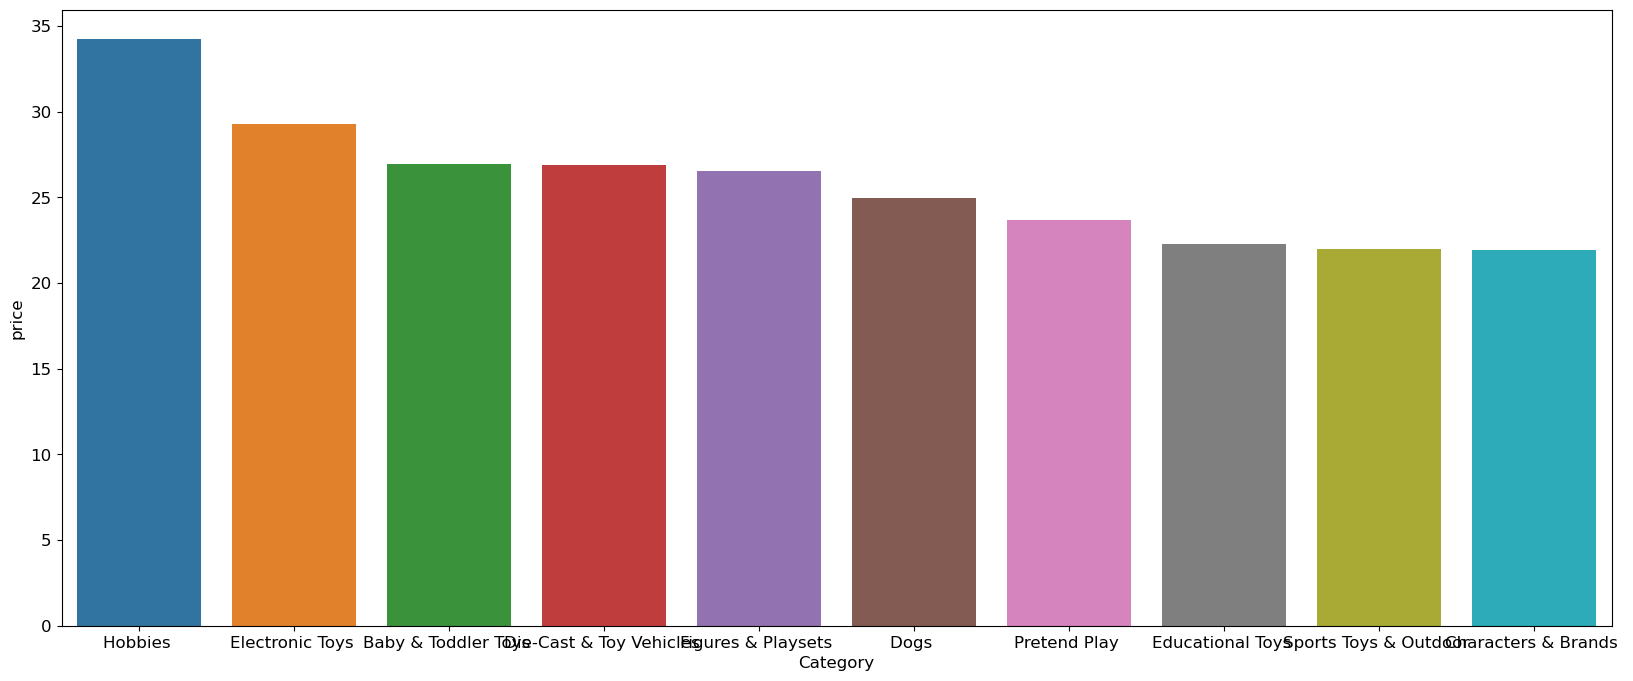

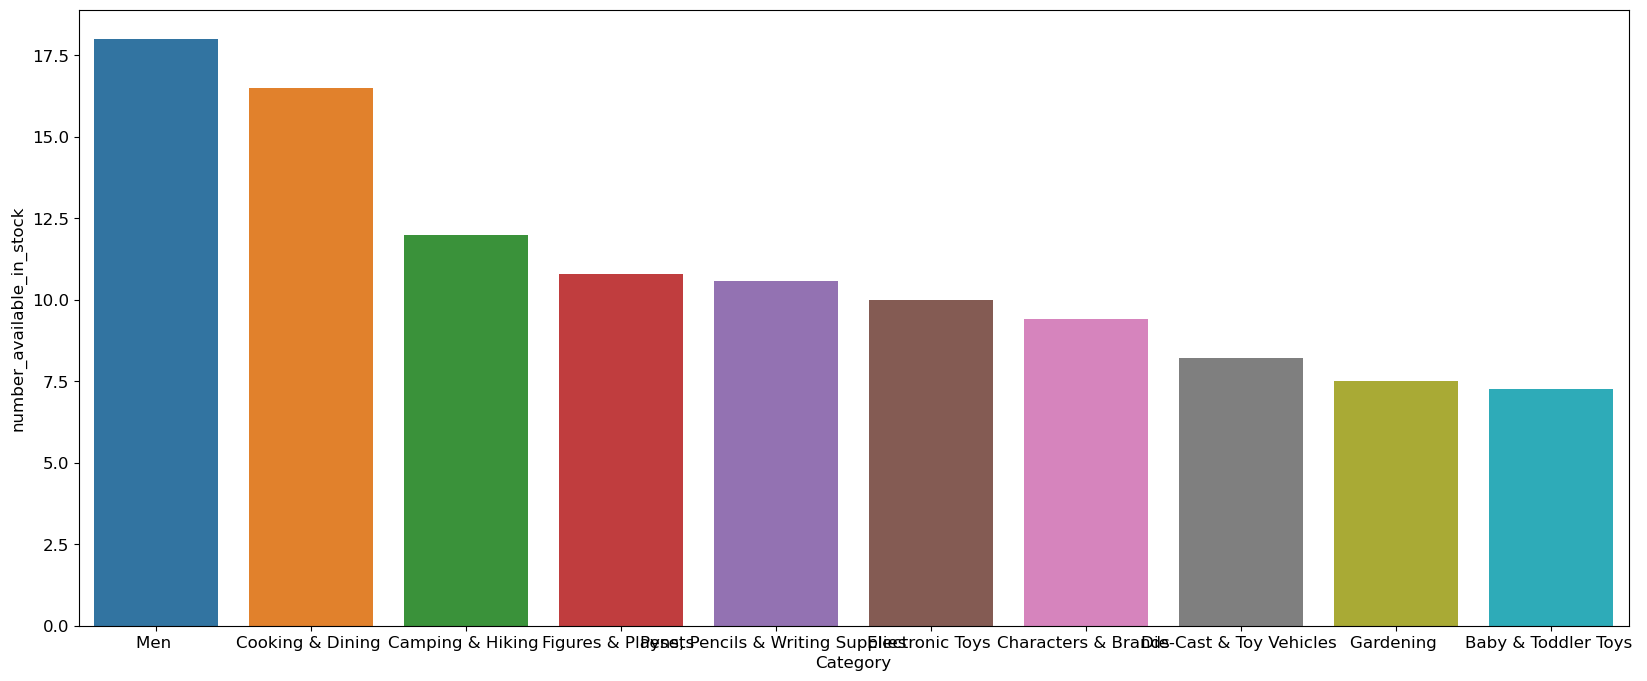

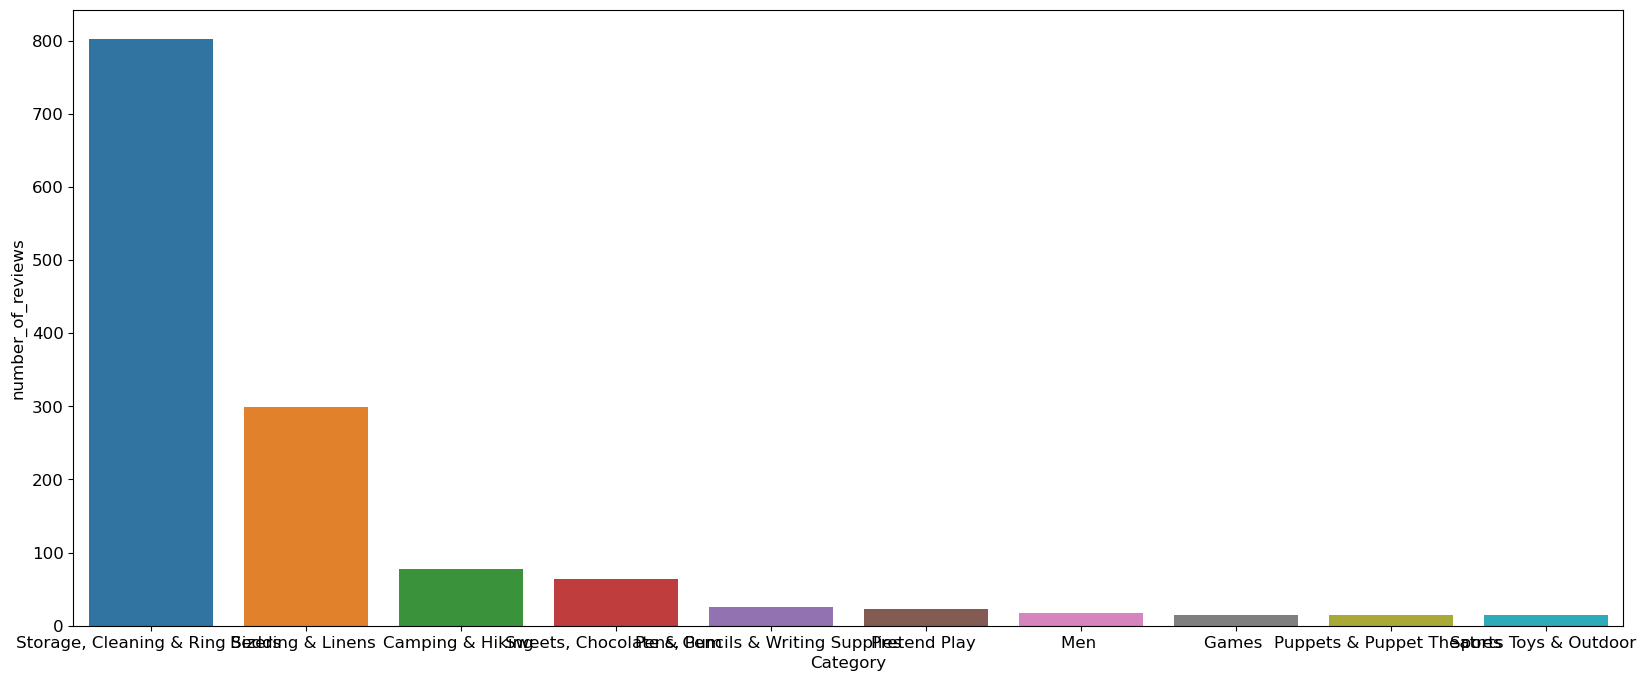

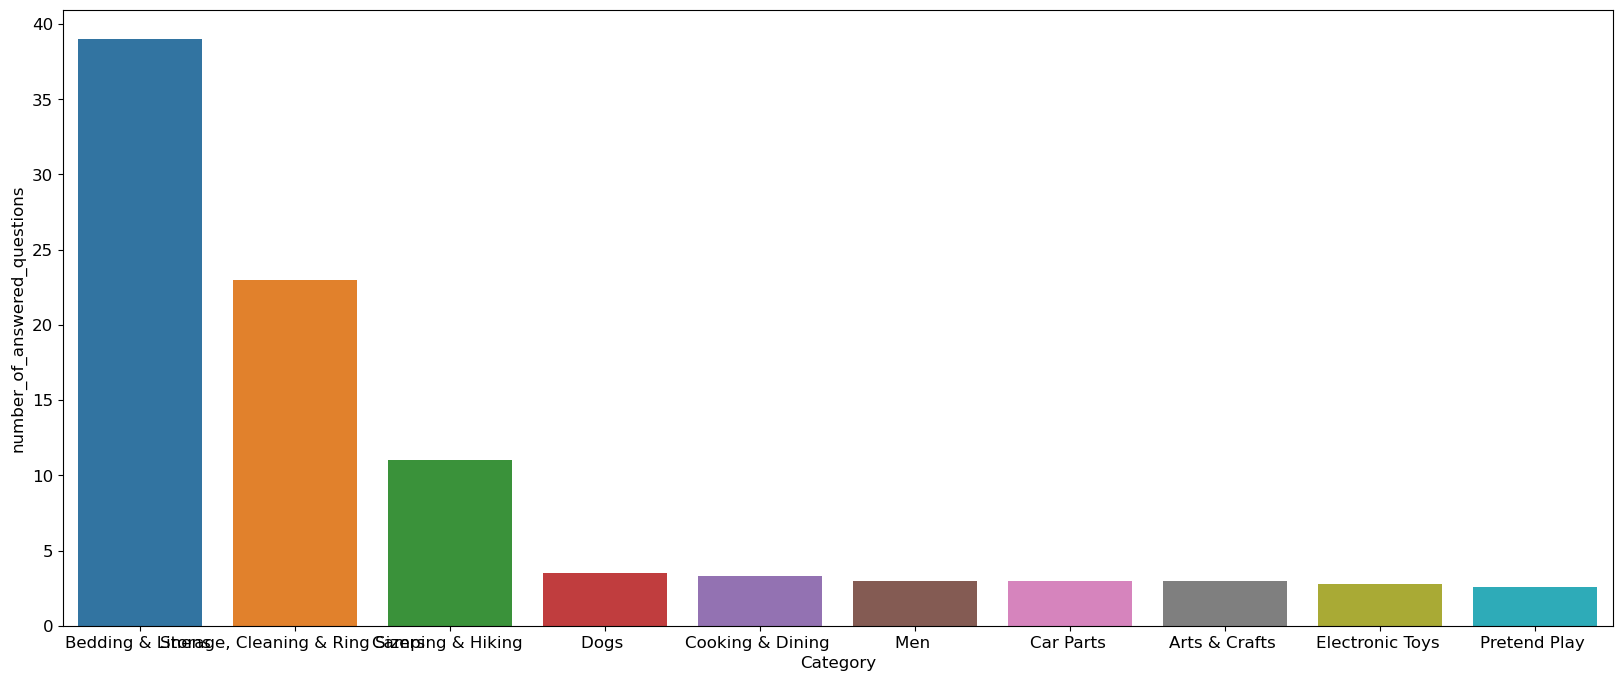

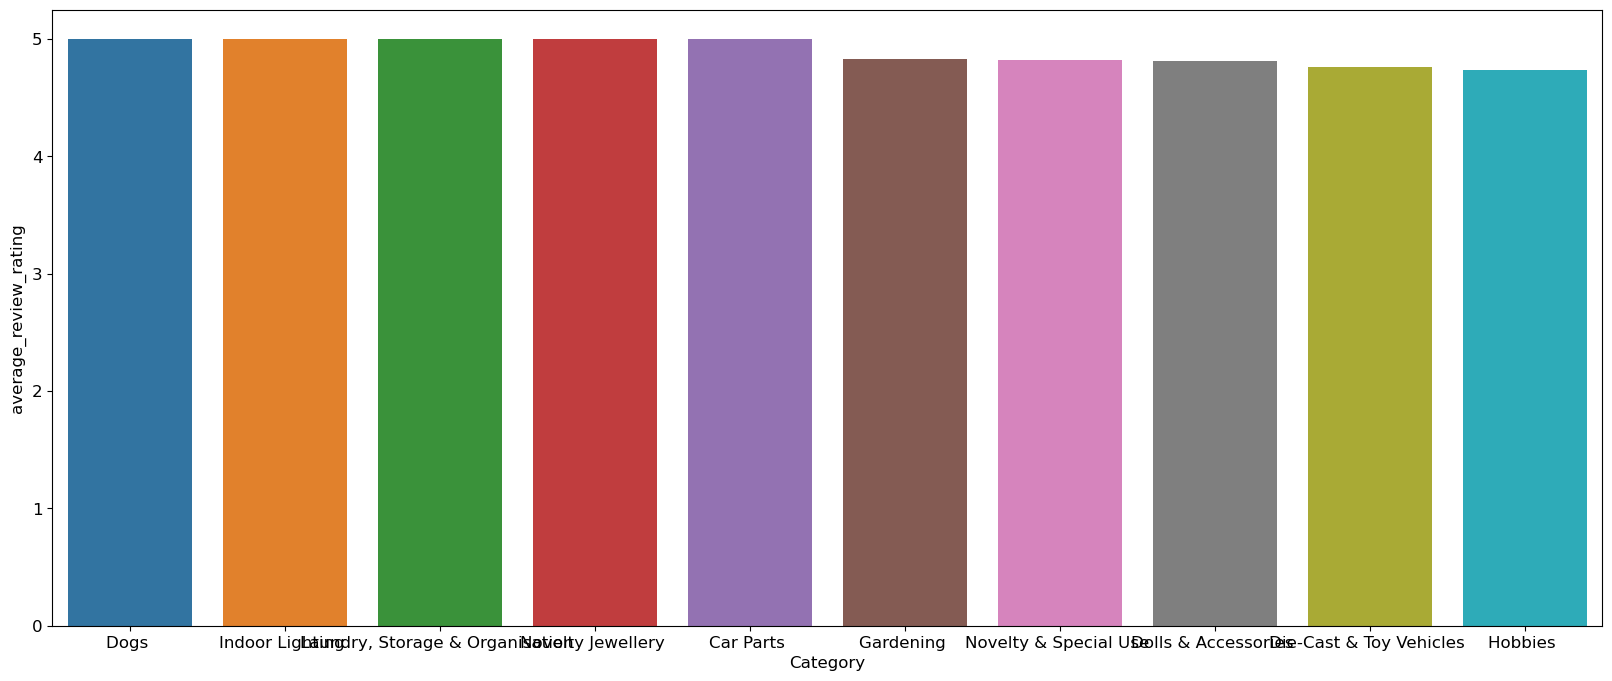

In [275]:
cols = df.select_dtypes(include = numeric).columns
for i in cols:
    A1 = df.groupby(["Category"])[i].mean().reset_index().sort_values(by = i,ascending = False).head(10)
    plt.figure(figsize = (20,8))
    sns.barplot(x = A1["Category"] , y = A1[i])


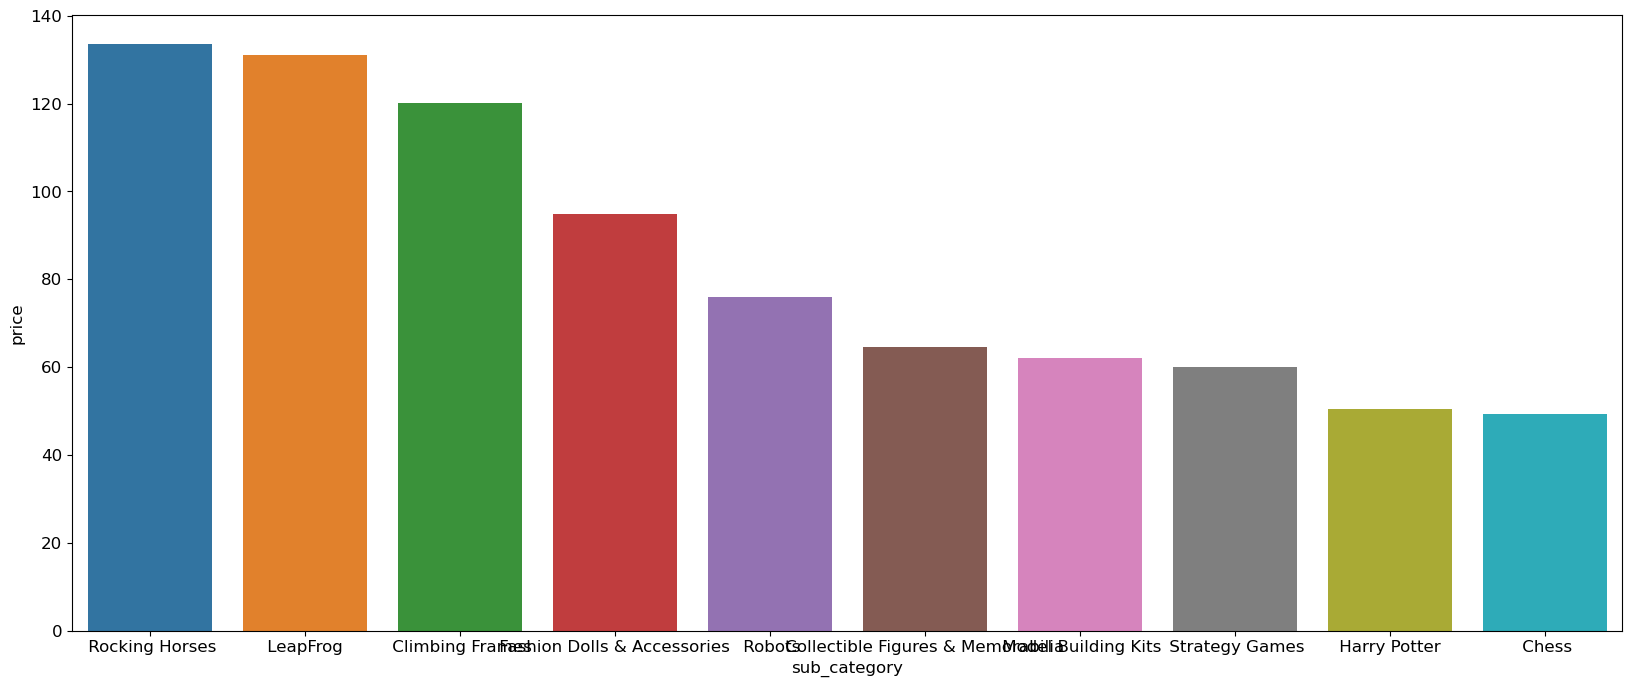

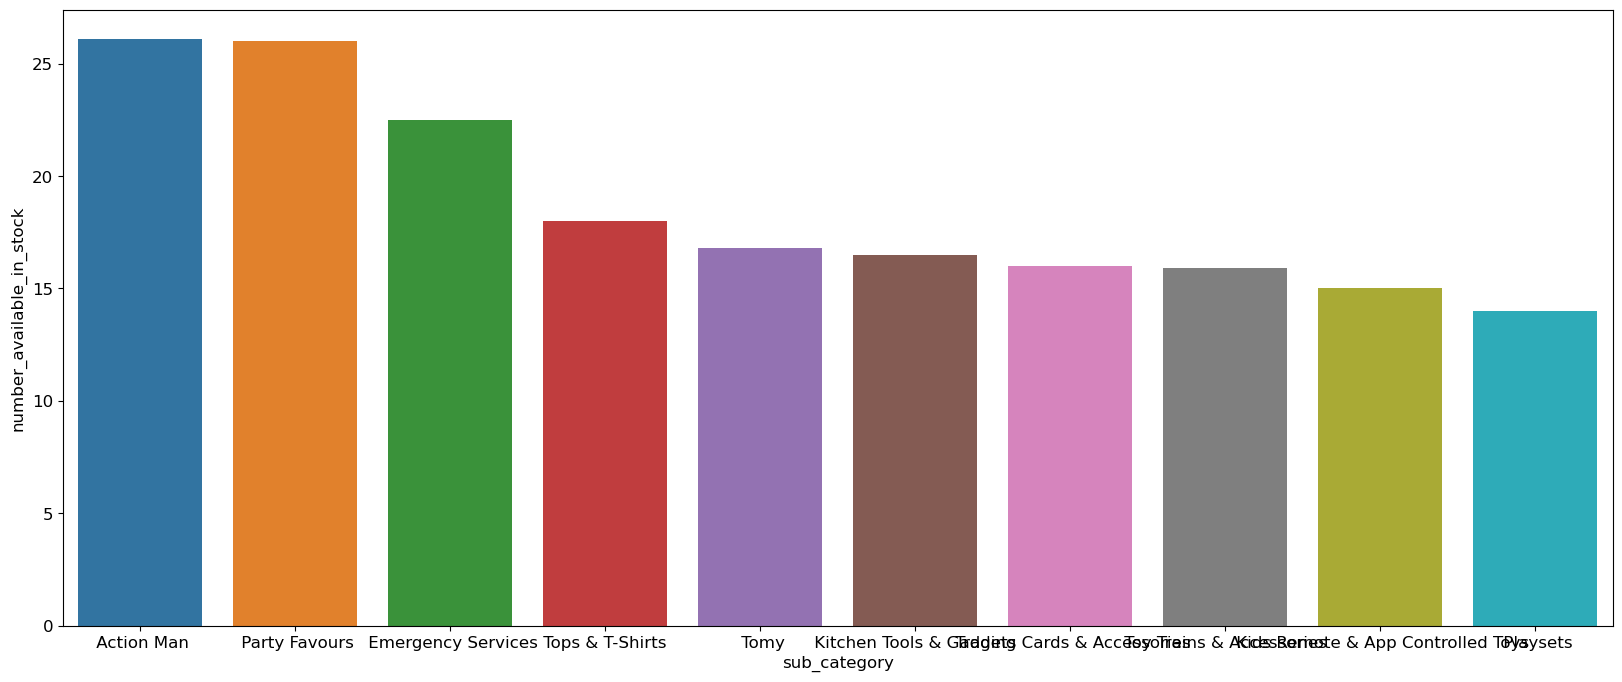

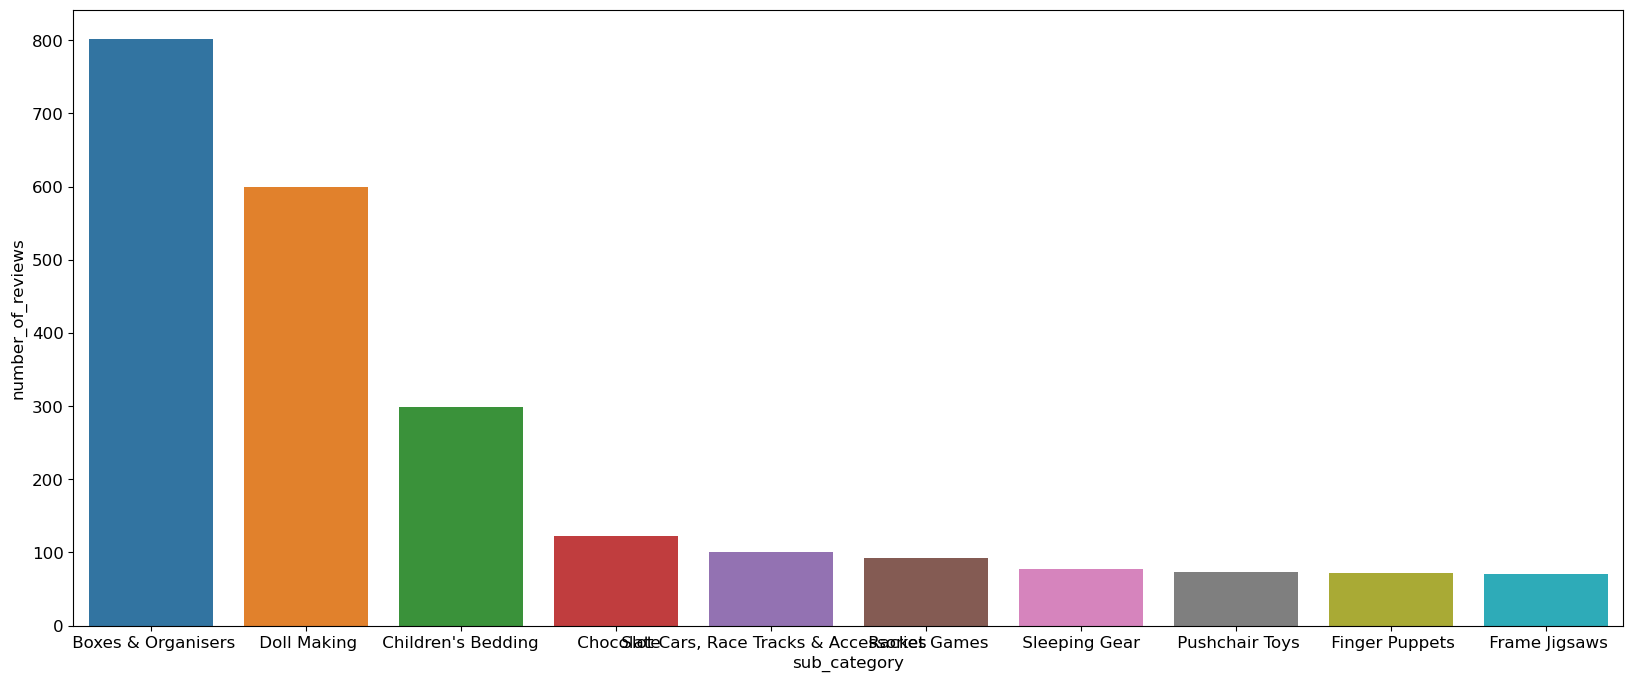

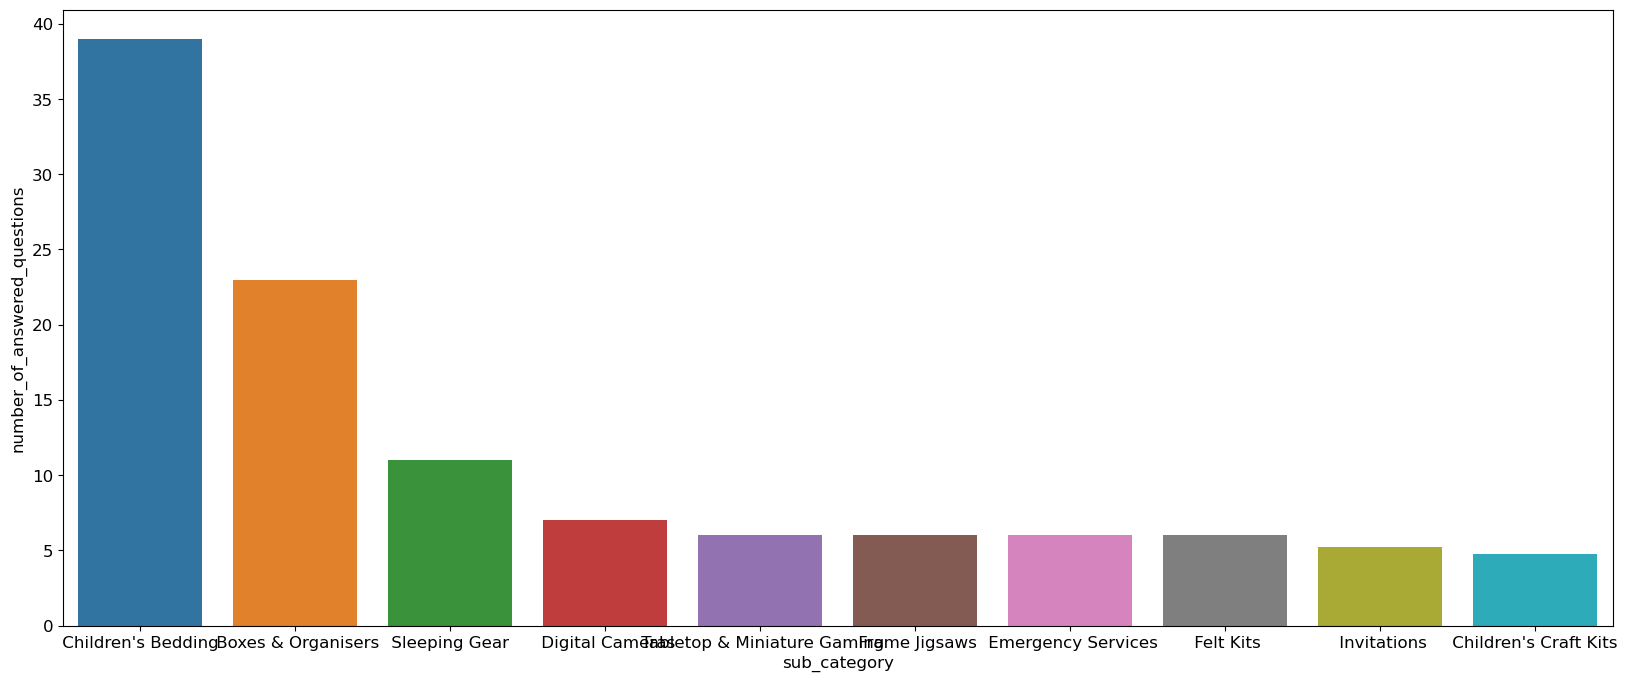

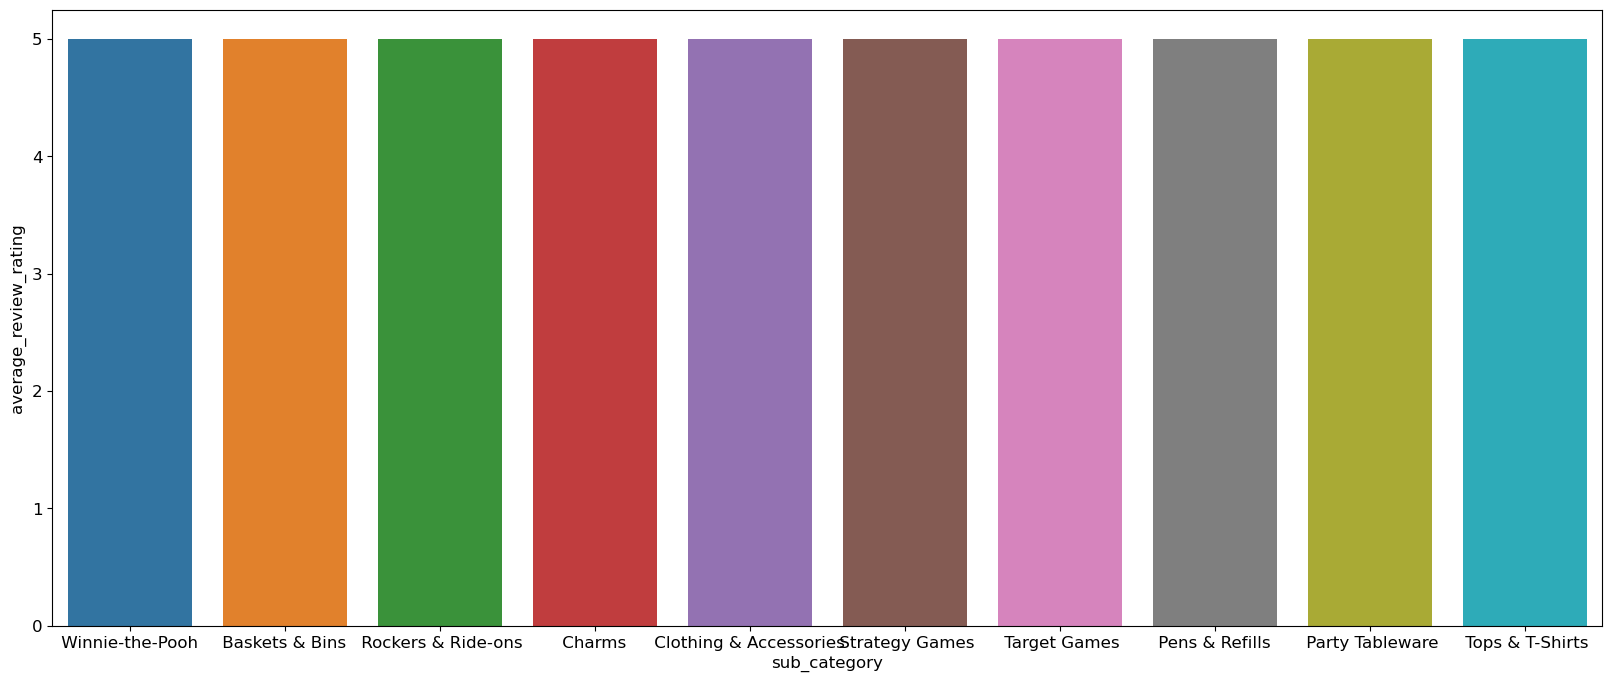

In [276]:
cols = df.select_dtypes(include = numeric).columns
for i in cols:
    A1 = df.groupby(["sub_category"])[i].mean().reset_index().sort_values(by = i,ascending = False).head(10)
    plt.figure(figsize = (20,8))
    sns.barplot(x = A1["sub_category"] , y = A1[i])

In [272]:
# top 10 manufracture in terms of price and bottom 10 also

A2 = df.groupby(["Category"])["price"].mean().reset_index().sort_values(by = "price",ascending = False).head(10)px.bar(x = A2["manufacturer"],y = A2["price"])



SyntaxError: invalid syntax (1931015869.py, line 3)

In [206]:
# bottom 10
A3 = df.groupby(["manufacturer"])["price"].mean().reset_index().sort_values(by = "price").head(10)
px.bar(x = A3["manufacturer"],y = A3["price"])

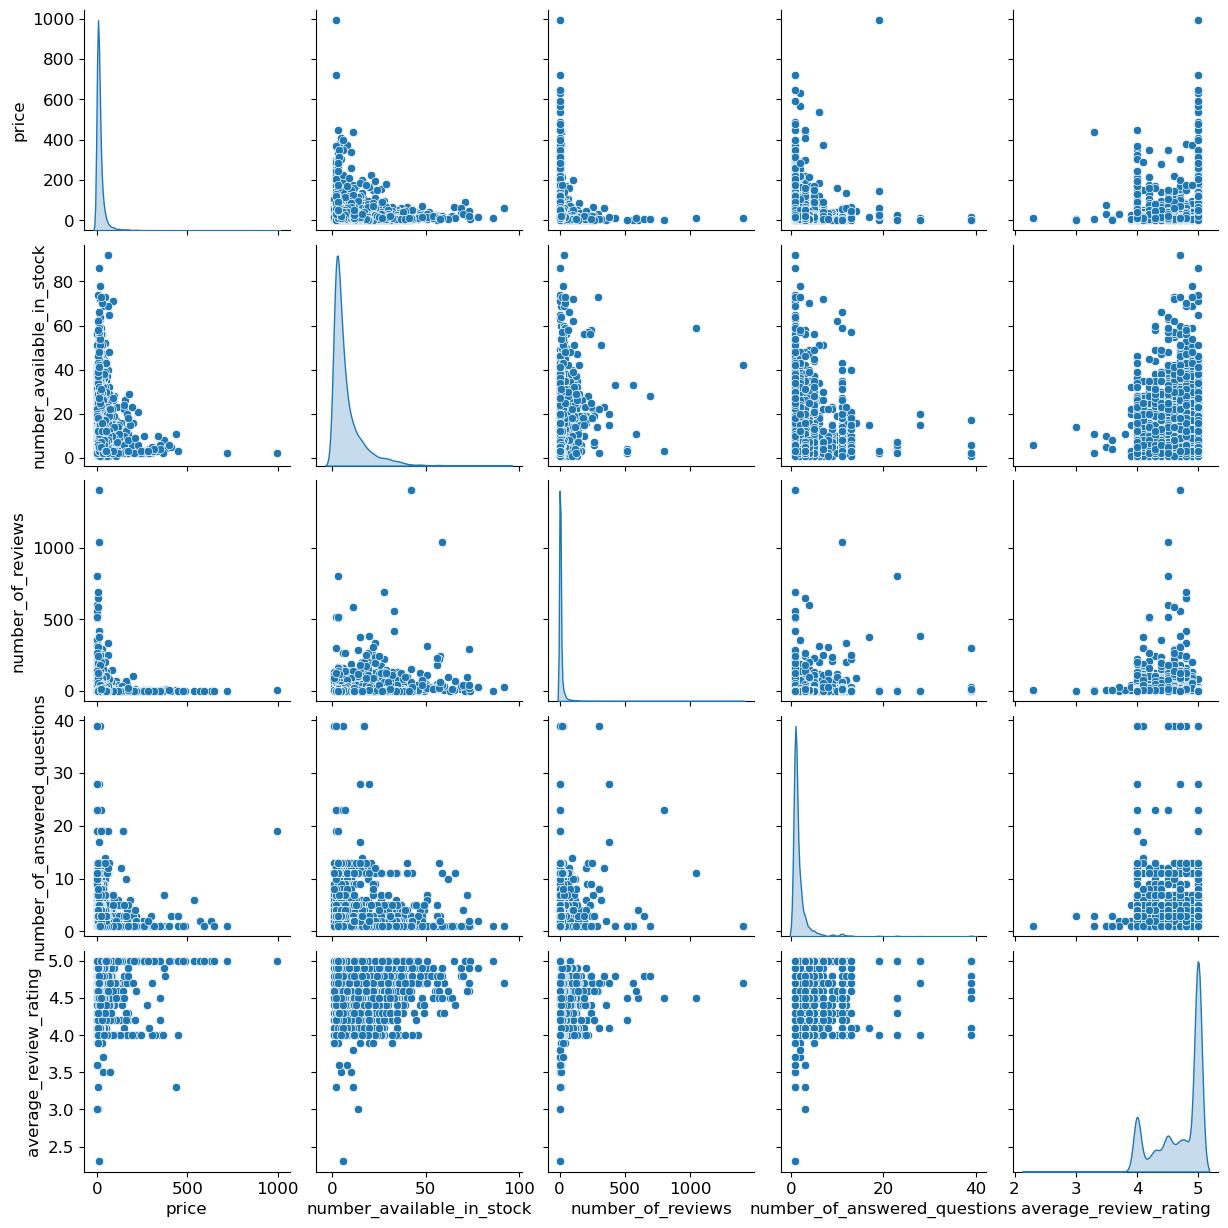

In [278]:
#  countinous varieble
sns.pairplot(df , diag_kind = "kde" )

Feature Engineering

In [281]:
df.describe()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,8565.000000,7500.000000,9982.000000,9235.000000,9982.000000
mean,19.978234,7.916933,9.139952,1.834976,4.707283
std,38.260334,8.805777,33.728145,2.517268,0.372279
min,0.010000,1.000000,1.000000,1.000000,2.300000
25%,4.990000,3.000000,1.000000,1.000000,4.500000
50%,10.600000,5.000000,2.000000,1.000000,5.000000
75%,19.900000,10.000000,6.000000,2.000000,5.000000
max,995.000000,92.000000,1399.000000,39.000000,5.000000


In [283]:
df.head()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,Category,sub_category
0,Hornby,3.42,5.0,15.0,1.0,4.9,Hobbies,Model Trains & Railway Sets
1,FunkyBuys,16.90,NaN,2.0,1.0,4.5,Hobbies,Model Trains & Railway Sets
2,ccf,9.99,2.0,17.0,2.0,3.9,Hobbies,Model Trains & Railway Sets
3,Hornby,39.90,NaN,1.0,2.0,5.0,Hobbies,Model Trains & Railway Sets
4,Hornby,32.10,NaN,3.0,2.0,4.7,Hobbies,Model Trains & Railway Sets


In [280]:
df.isnull().sum()

manufacturer                       7
price                           1435
number_available_in_stock       2500
number_of_reviews                 18
number_of_answered_questions     765
average_review_rating             18
Category                         690
sub_category                     690
dtype: int64

In [284]:
# categorical varieble filling null value with mode
df["manufacturer"] = df["manufacturer"].fillna(df["manufacturer"].mode()[0])
df["Category"] = df["Category"].fillna(df["Category"].mode()[0])
df["sub_category"] = df["sub_category"].fillna(df["sub_category"].mode()[0])



In [289]:
# random imputation
random_sample = df["number_of_reviews"].dropna().sample(df["number_of_reviews"].isnull().sum() , random_state = 1)
random_sample.index = df[df["number_of_reviews"].isnull()].index
df.loc[df["number_of_reviews"].isnull() ,"number_of_reviews" ] = random_sample

In [292]:
random_sample = df["number_of_answered_questions"].dropna().sample(df["number_of_answered_questions"].isnull().sum() , random_state = 1)
random_sample.index = df[df["number_of_answered_questions"].isnull()].index
df.loc[df["number_of_answered_questions"].isnull() ,"number_of_answered_questions" ] = random_sample

In [294]:
random_sample = df["number_available_in_stock"].dropna().sample(df["number_available_in_stock"].isnull().sum() , random_state = 1)
random_sample.index = df[df["number_available_in_stock"].isnull()].index
df.loc[df["number_available_in_stock"].isnull() ,"number_available_in_stock" ] = random_sample

In [295]:
df.isnull().sum()

manufacturer                       0
price                           1435
number_available_in_stock          0
number_of_reviews                  0
number_of_answered_questions       0
average_review_rating             18
Category                           0
sub_category                       0
dtype: int64

In [296]:
df["price"] = df["price"].fillna(df["price"].median())
df["price"] = df["price"].fillna(df["price"].median())


In [297]:
df.isnull().sum()

manufacturer                     0
price                            0
number_available_in_stock        0
number_of_reviews                0
number_of_answered_questions     0
average_review_rating           18
Category                         0
sub_category                     0
dtype: int64

In [298]:
df = df.dropna()

Outliers analysis

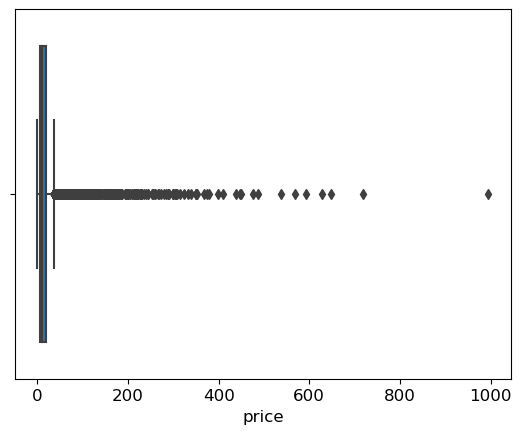

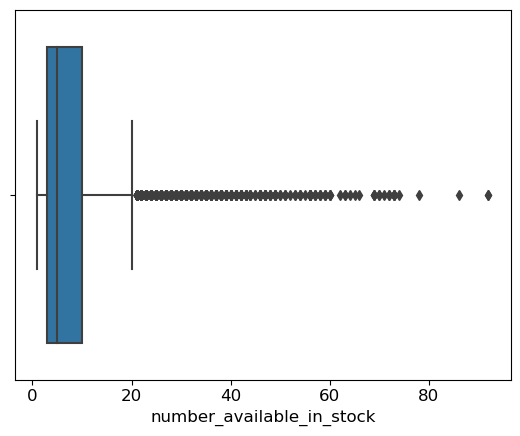

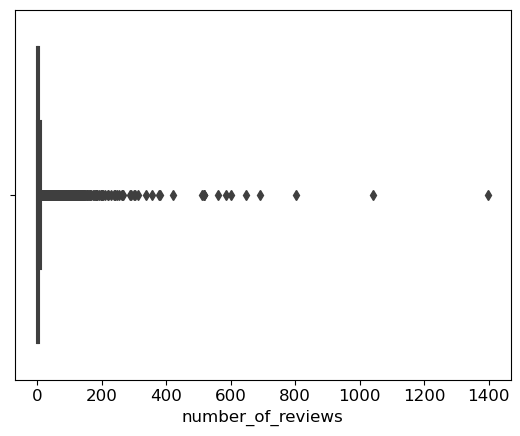

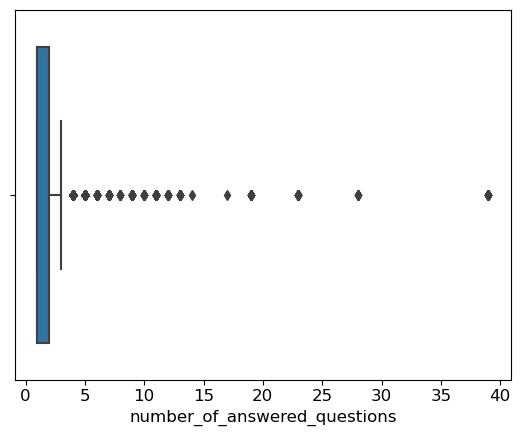

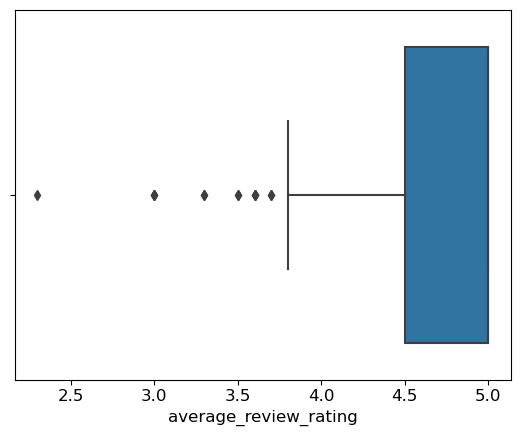

In [301]:
for i in df.select_dtypes(include = numeric).columns:
    plt.figure()
    sns.boxplot(x = df[i])

In [302]:
def outliers_removal(df):
    for i in df.select_dtypes(include = numeric).columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3-q1
        UL = q3+1.5*IQR
        LL = q1-1.5*IQR
        df = df[(df[i]>LL) & (df[i]<UL)]
    return df 
        

In [303]:
df1 = outliers_removal(df)

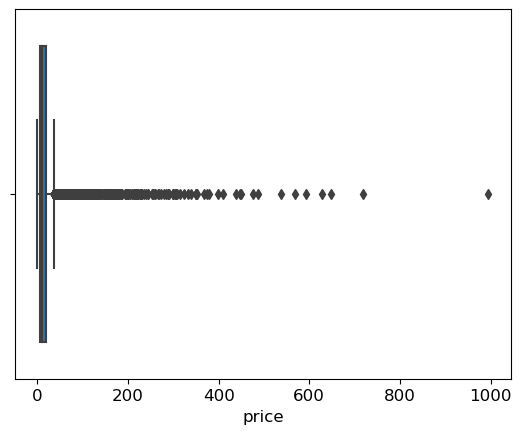

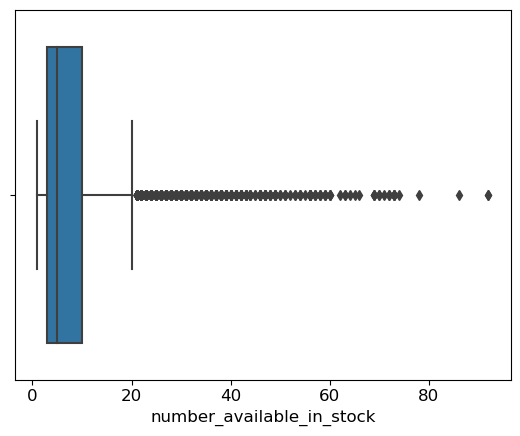

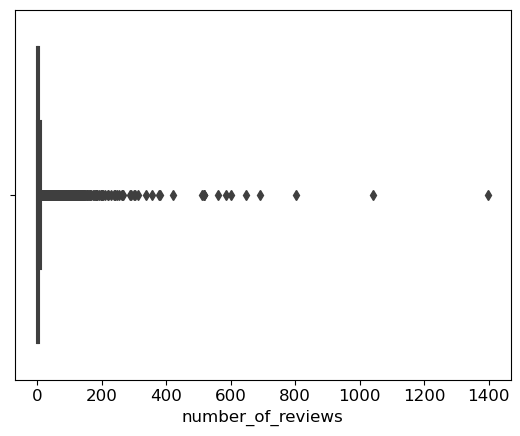

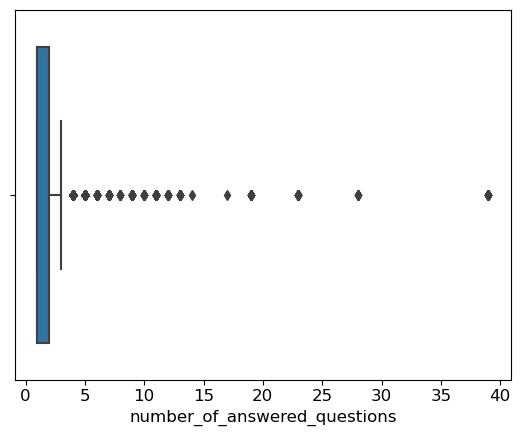

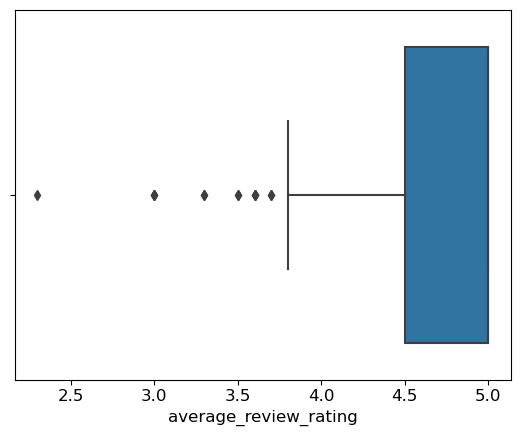

In [305]:
for i in df1.select_dtypes(include = numeric).columns:
    plt.figure()
    sns.boxplot(x = df[i])

In [306]:
df.shape,df1.shape

((9982, 8), (6704, 8))